In [1]:
using Plots, Measures, Distributions
gr()

Plots.GRBackend()

In [2]:
meanVect = [27.1554, 26.1638]
covMat = [16.1254 13.047; 13.047 12.3673]

2×2 Array{Float64,2}:
 16.1254  13.047 
 13.047   12.3673

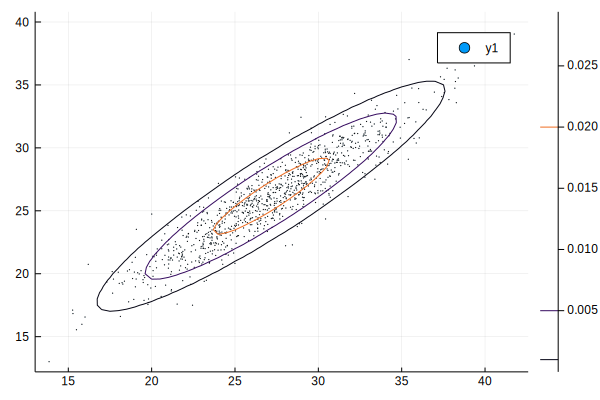

In [3]:
biNorm = MvNormal(meanVect, covMat)
N = 10^3
points = rand(MvNormal(meanVect,covMat),N)
support = 15:0.5:40
z = [ pdf(biNorm,[x,y]) for y in support, x in support ]
p1 = scatter(points[1,:], points[2,:], ms=0.5)
p1 = contour!(support, support, z, levels=[0.001, 0.005, 0.02])

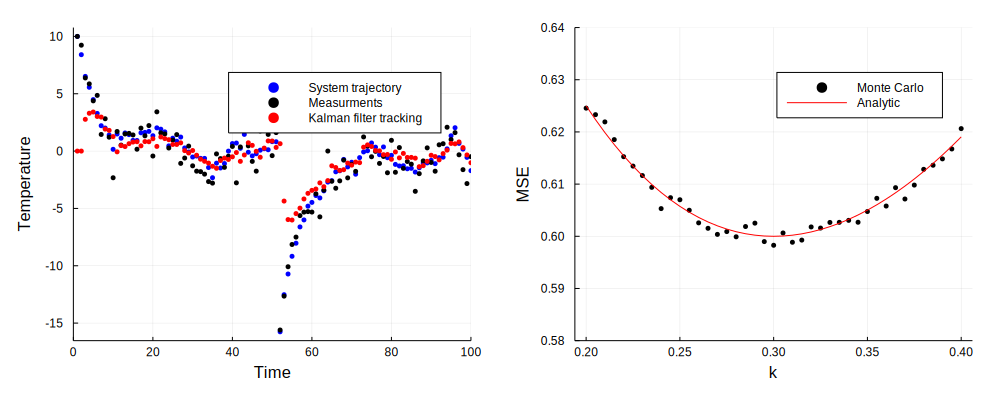

In [4]:
using Distributions, LinearAlgebra, Random, Measures, Plots; gr()
Random.seed!(0)
a, varXi, varZeta, = 0.8, 0.36, 1.0

X0, spikeTime, spikeSize = 10.0, 50, -20.0
Tsmall, Tlarge, warmTime = 100, 10^6, 10^4
kKalman = 0.3

function luenbergerTrack(k, T, spikeTime = Inf)
    X, Xhat = X0, 0.0
    xTraj, xHatTraj, yTraj = [X], [Xhat,Xhat], [X0]
    for t in 1:T-1
        X = a*X + rand(Normal(0,sqrt(varXi)))
        Y = X + rand(Normal(0,sqrt(varZeta)))
        Xhat =a*Xhat - k*(Xhat - Y)
        push!(xTraj,X)
        push!(xHatTraj,Xhat)
        push!(yTraj,Y)
        
        if t == spikeTime
            X += spikeSize
        end
    end
    deleteat!(xHatTraj,length(xHatTraj))
    xTraj, xHatTraj, yTraj
end

smallTraj, smallHat, smallY = luenbergerTrack(kKalman, Tsmall, spikeTime)

p1 = scatter(smallTraj, c=:blue, 
    ms=3, msw=0, label="System trajectory")
p1 = scatter!(smallY, c = :black,
    ms=3, msw=0, label="Measurments")
p1 = scatter!(smallHat,c=:red,
    ms=3, msw=0, label="Kalman filter tracking",
    xlabel = "Time", ylabel = "Temperature",
    xlims=(0, Tsmall))

kRange = 0.2:0.005:0.4
errs = []
for k in kRange
    xTraj, xHatTraj, _ = luenbergerTrack(k, Tlarge)
    mse = norm(xTraj[warmTime:end] - xHatTraj[warmTime:end])^2/(Tlarge-warmTime)
    push!(errs, mse)
end

analyticErr(k) =(varXi + k^2*varZeta) / (1-(a-k)^2)

p2 = scatter(kRange,errs, c=:black, ms=3, msw=0,
    xlabel="k", ylabel="MSE", label = "Monte Carlo")
p2 = plot!(kRange,analyticErr.(kRange), c = :red,
    xlabel="k", ylabel="MSE", label = "Analytic", ylim =(0.58,0.64))

plot(p1, p2, size=(1000,400), margin = 5mm)

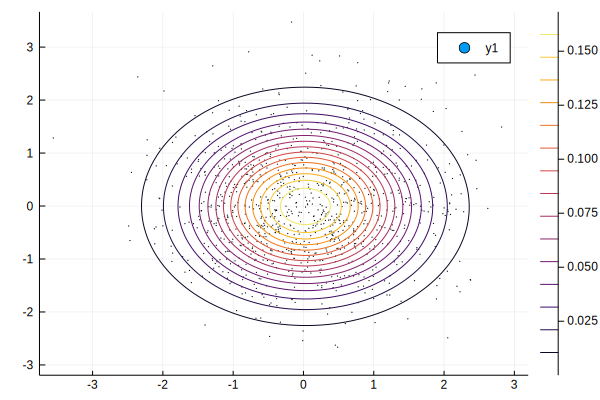

In [5]:
using Distributions, LinearAlgebra, Random, Measures, Plots; gr()

X = rand(Normal(0, 1), 1000)
Y = rand(Normal(0, 1), 1000)

# p1 = scatter(X, Y, ms=0.5)
cov(hcat(X, Y))
# p1 = contour!(support, support, z, levels=[0.001, 0.005, 0.02])
meanVect = [mean(X), mean(Y)]
covMat = cov(hcat(X, Y))

biNorm = MvNormal(meanVect, covMat)

xgrid = -3:0.05:3
ygrid = -3:0.05:3
z = [ pdf(biNorm, [x,y]) for y in ygrid, x in xgrid ]
p1 = scatter(X, Y, ms=0.5)
p1 = contour!(xgrid, ygrid, z)